In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Home Team MODEL

In [2]:
home_team = pd.read_csv('./datasets/created/home_db.csv')
home_team.head()

,home_score,away_goals_suf_mean,away_goals_mean,away_goals_suf_mean_l5,away_goals_mean_l5,home_goals_mean,home_goals_suf_mean,home_goals_mean_l5,home_goals_suf_mean_l5
0,0,1.714286,0.428571,1.6,0.6,1.714286,1.857143,1.4,2.2
1,1,2.333333,1.333333,1.8,1.4,1.375000,1.250000,1.2,1.2
2,2,1.500000,2.000000,1.4,1.8,0.375000,1.500000,0.6,1.4
3,1,2.571429,0.857143,2.4,0.4,1.500000,1.625000,1.4,1.6
4,1,1.111111,1.333333,0.8,1.2,1.000000,1.142857,0.6,0.6


In [3]:
X = home_team.drop(["home_score"], axis=1)
y = home_team[["home_score"]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [11]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [8]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [9]:
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", grid_search.best_score_)

Best Parameters: {'regressor__fit_intercept': True}
Best MSE: -1.5240423919028698


In [15]:
def residuals_plot(y_pred, y_test):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    #plt.plot([min(y_test), min(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()

In [11]:
y_values = [a[0] for a in y_test.values]


In [12]:
y_pred = [a[0] for a in grid_search.predict(X_test.values)]#.mean()


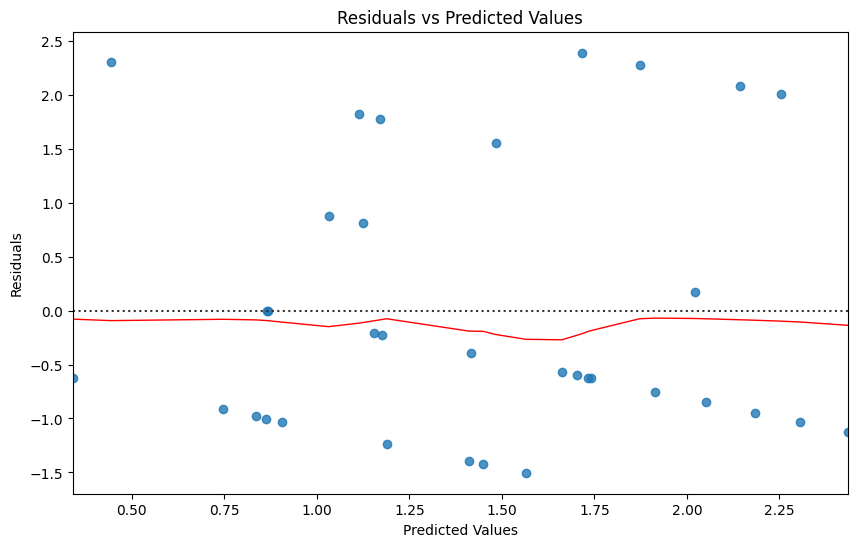

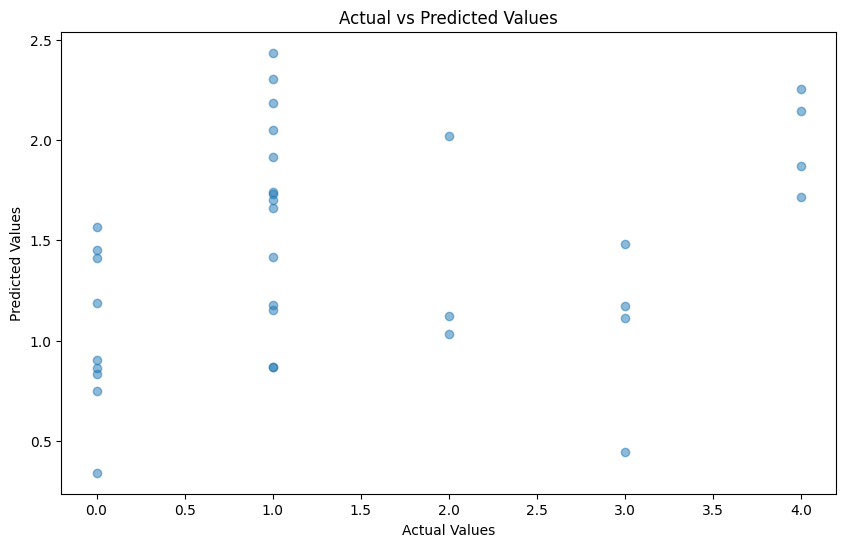

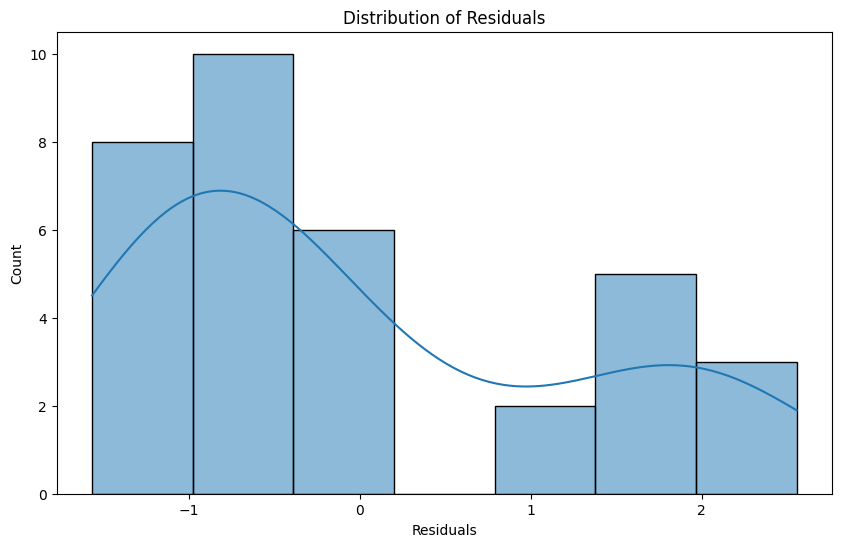

In [13]:
residuals_plot(np.array(y_pred), np.array(y_values))


In [14]:
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [15]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'max_features': ['log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [16]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.3861593596401662
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}
Best MSE Score: -1.421004941387849


In [17]:
y_pred = grid_search.predict(X_test.values)


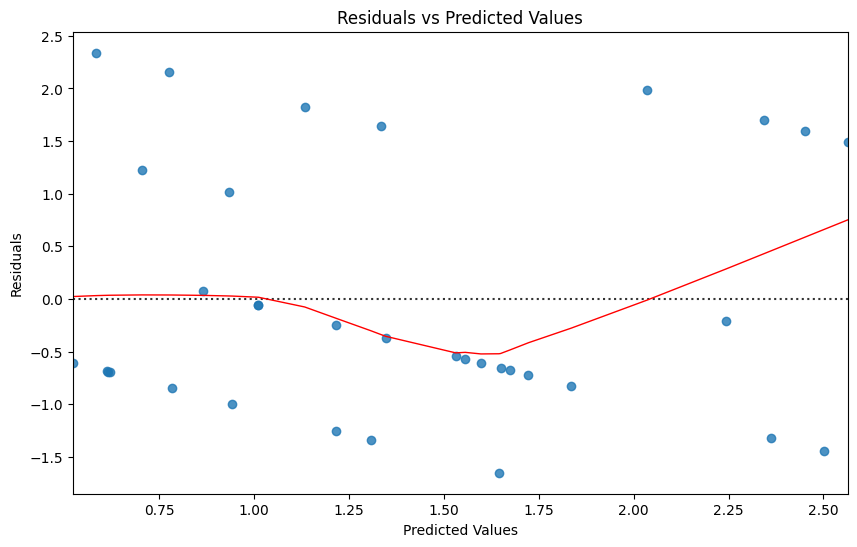

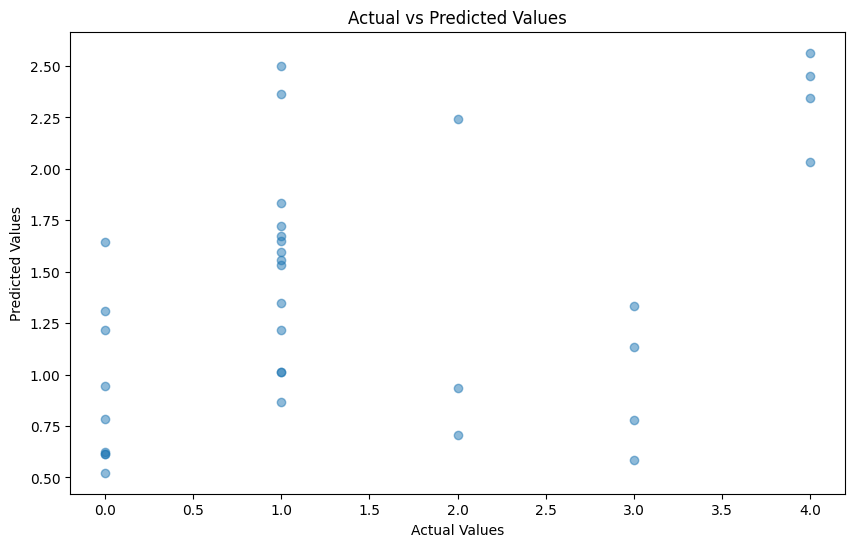

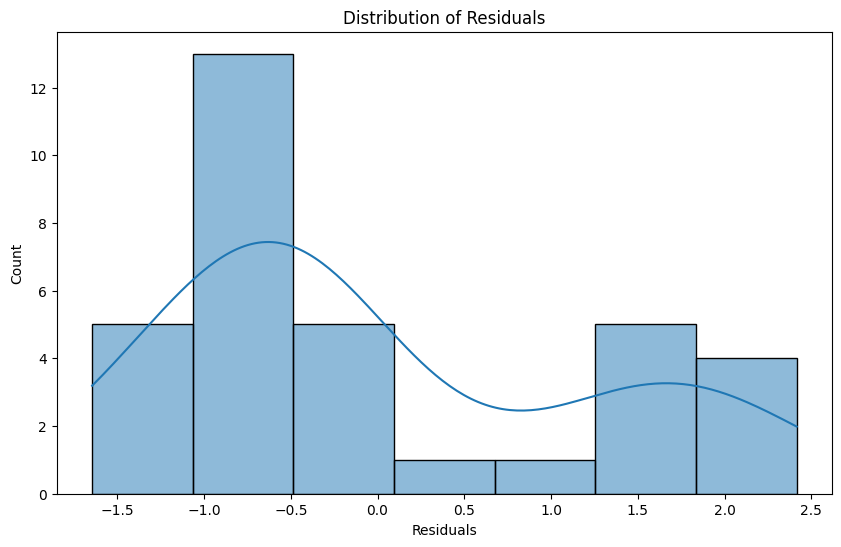

In [18]:
residuals_plot(np.array(y_pred), np.array(y_values))


In [19]:
rf = grid_search.best_estimator_


In [20]:
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [21]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [22]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.3451390594082187
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Best MSE Score: -1.5942804059622082


/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [23]:
y_pred = grid_search.predict(X_test.values)


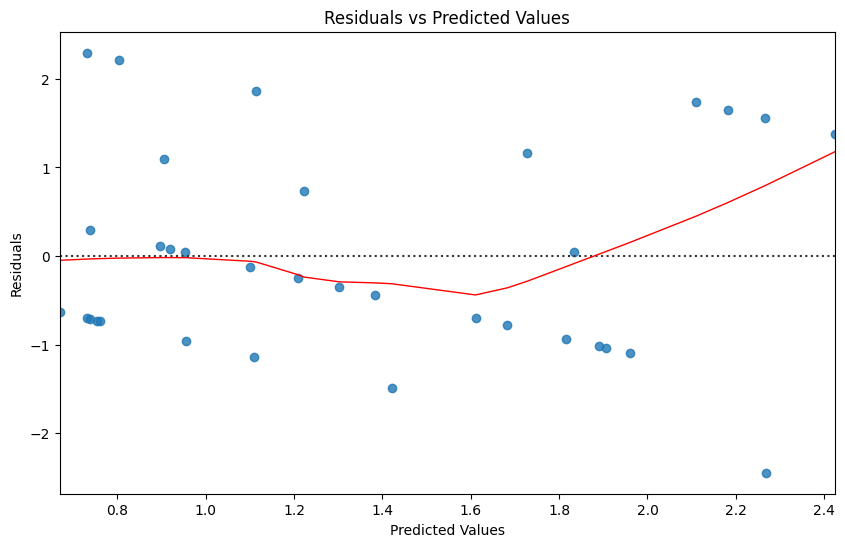

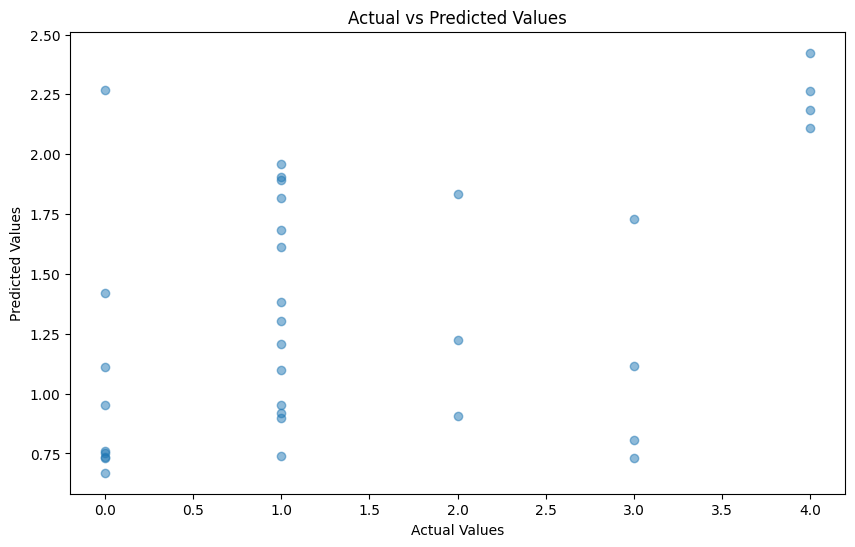

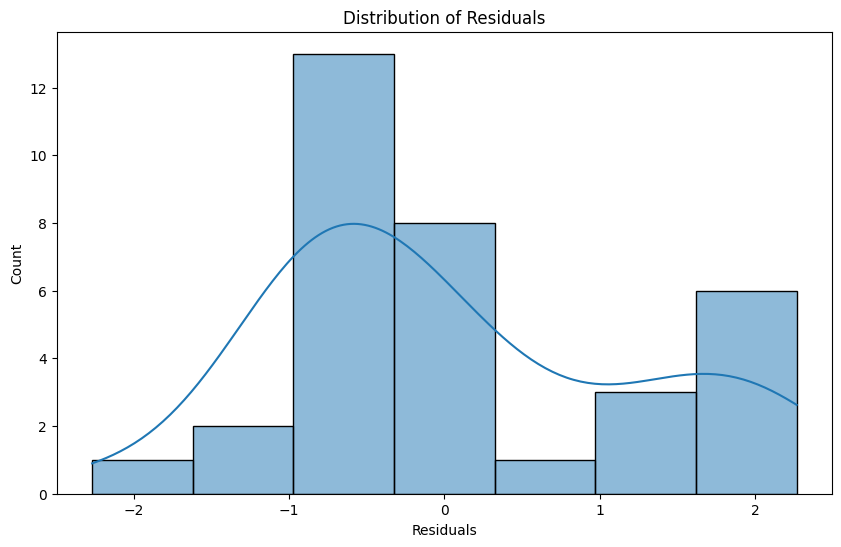

In [24]:
residuals_plot(y_pred, y_values)


In [25]:
import pickle
import os

models_folder = "./models"

os.makedirs(models_folder, exist_ok=True)


with open('models/rf_home.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Away Team MODEL

In [4]:
df = pd.read_csv("./datasets/created/away_db.csv")

In [5]:
X = df.drop(["away_score"], axis=1)
y = df[["away_score"]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [9]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [12]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [13]:
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", grid_search.best_score_)

Best Parameters: {'regressor__fit_intercept': True}
Best MSE: -1.1419734754194422


In [14]:
y_values = [a[0] for a in y_test.values]
y_pred = [a[0] for a in grid_search.predict(X_test.values)]#.mean()

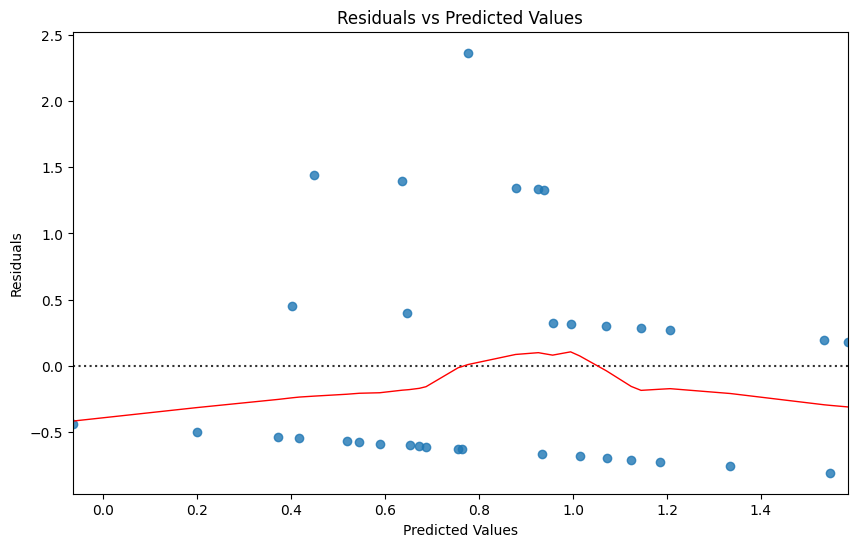

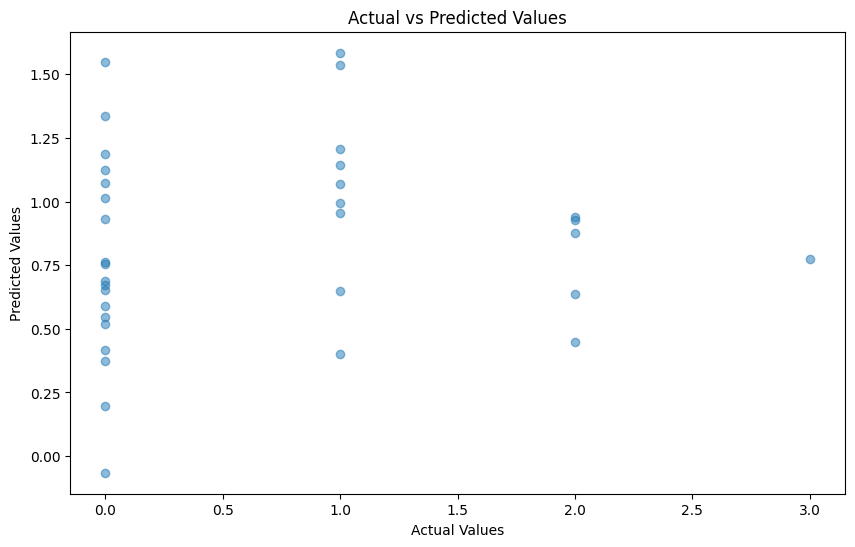

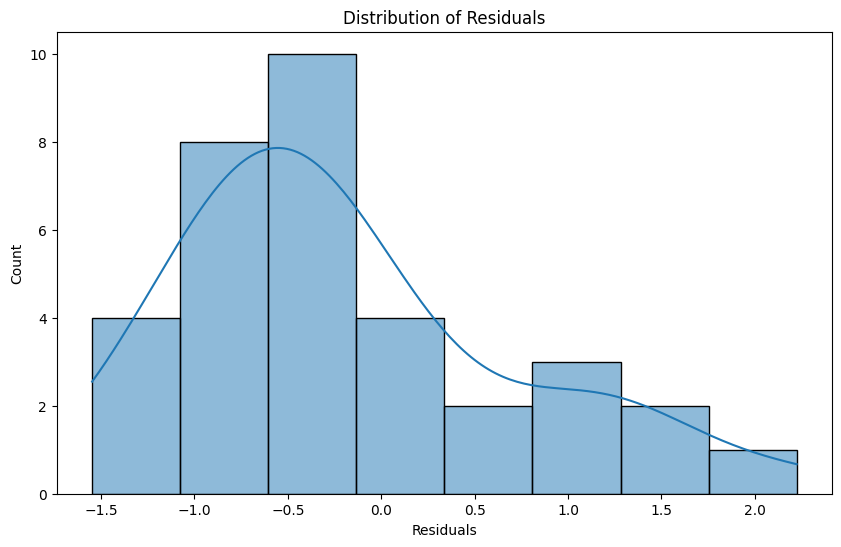

In [16]:
residuals_plot(np.array(y_pred), np.array(y_values))


In [18]:
lr = grid_search.best_estimator_
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [19]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'max_features': ['log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [20]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 0.7761556564654641
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300}
Best MSE Score: -1.0751380206531345


In [21]:
y_pred = grid_search.predict(X_test.values)


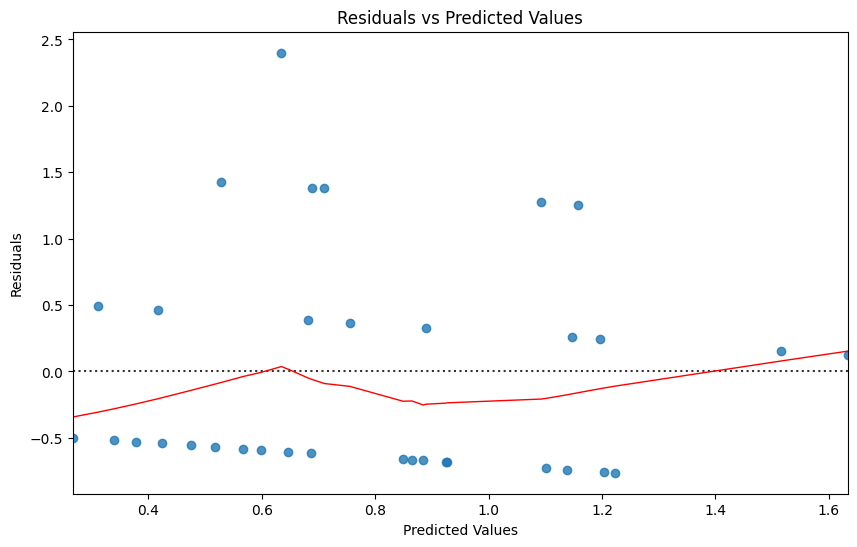

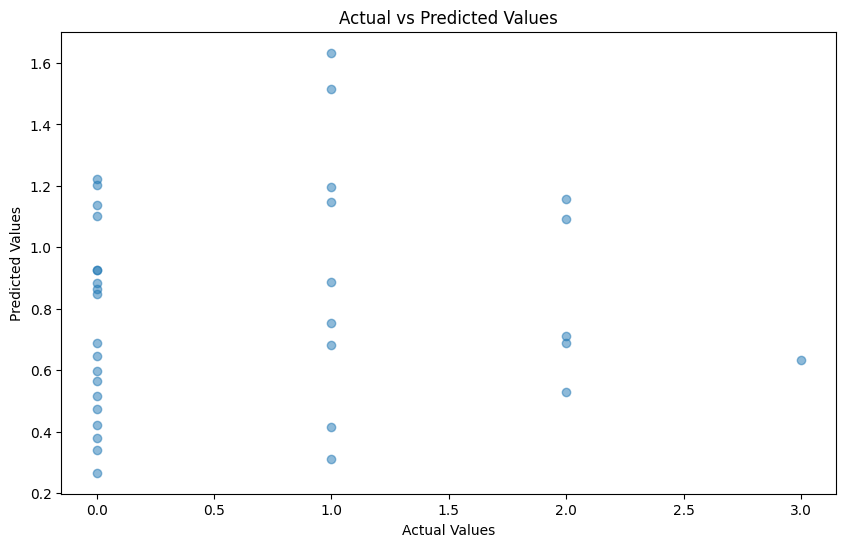

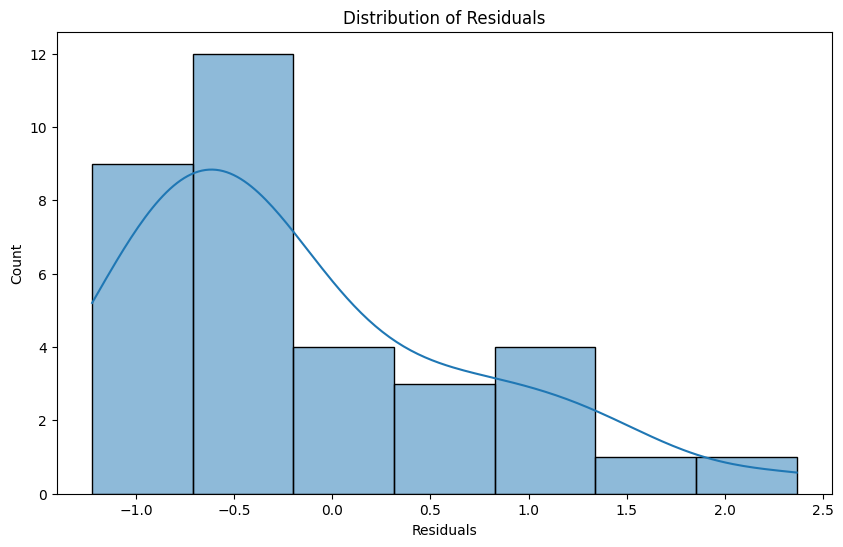

In [22]:
residuals_plot(y_pred, y_values)


In [23]:
rf = grid_search.best_estimator_
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [24]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [25]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 0.7567949004700969
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best MSE Score: -1.067156854548413


In [26]:
y_pred = grid_search.predict(X_test.values)

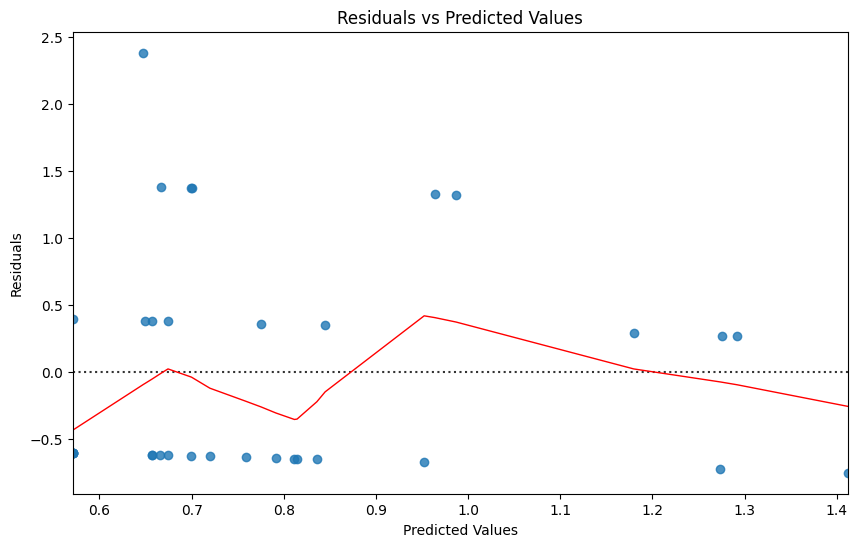

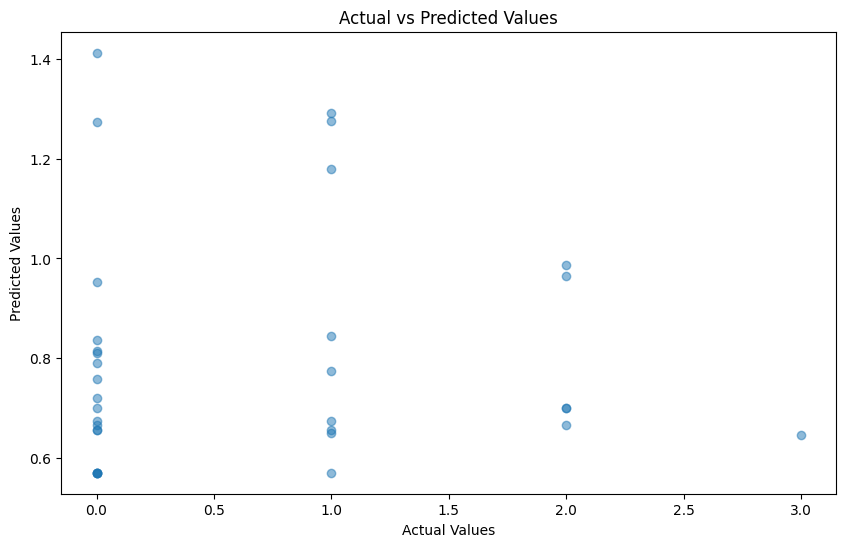

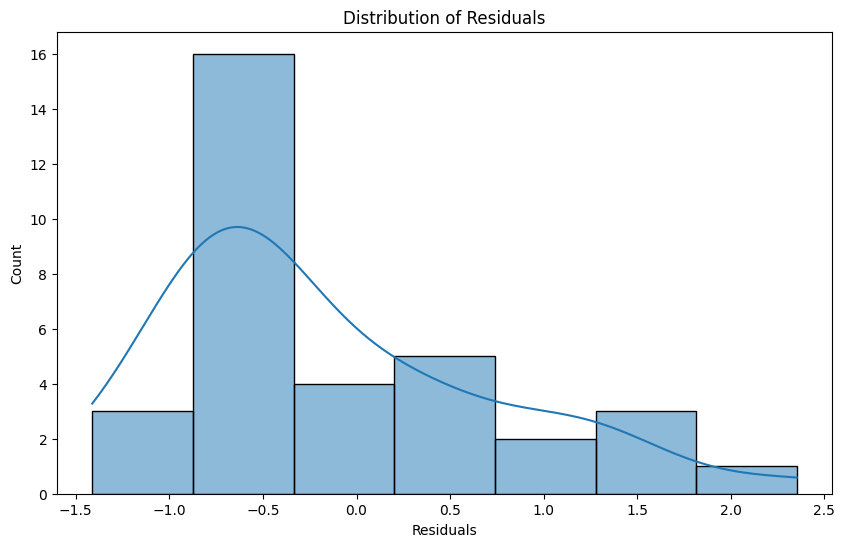

In [27]:
residuals_plot(y_pred, y_values)


In [28]:
import pickle
import os

models_folder = "./models"

os.makedirs(models_folder, exist_ok=True)


with open('models/rf_away.pkl', 'wb') as f:
    pickle.dump(rf, f)